In [ ]:
python --version

NameError: ignored

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

tensorflow.test.gpu_device_name()

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
titleN = "SWaT_Dataset_Normal_v0"
n_df = pd.read_csv("/content/drive/MyDrive/CI Project/" + titleN + ".csv")

n_df = n_df[['FIT101', 'LIT101', 'MV101', 'P101', 'P102']]
print(n_df.iloc[:5])

     FIT101    LIT101  MV101  P101  P102
0  2.470294  261.5804      2     2     1
1  2.457163  261.1879      2     2     1
2  2.439548  260.9131      2     2     1
3  2.428338  260.2850      2     2     1
4  2.424815  259.8925      2     2     1


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

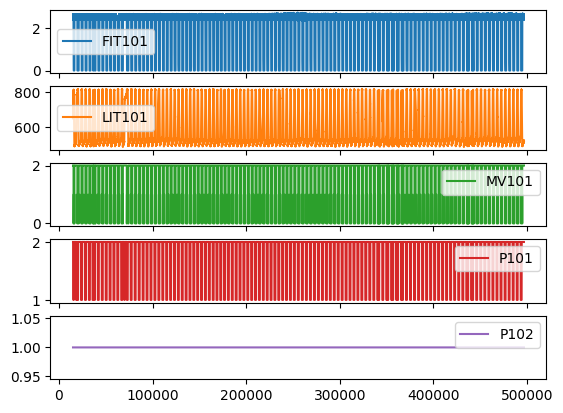

In [ ]:
n_df = n_df[15000:]
n_df.plot(subplots = True)

In [ ]:
# df = n_df[n_df.index % 100 == 0]
df = n_df

In [ ]:
# train_data, test_data = train_test_split(df, test_size=0.2)
train_data = df[0 : int(0.8*len(df))]
test_data = df[int(0.8*len(df)) : ]

# Scale the training and testing data
scaler = MinMaxScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [ ]:
print(len(train_data_scaled))
print(len(test_data_scaled))

385440
96360


In [ ]:
std1 = np.std(train_data_scaled)
threshold1 = 5 * std1

print(threshold1)

2.2716345142589485


In [ ]:
# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(20, input_shape=(5, 5)))
model.add(Dense(5))
model.compile(loss='mse', optimizer='adam')

In [ ]:
X_train = np.empty(shape=(385435, 5, 5))
y_train = []
for i in range(5, len(train_data)):
    X_train[i-5] = train_data_scaled[i-5:i, :]
y_train = train_data_scaled[5:]
X_train, y_train = np.array(X_train), np.array(y_train)

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=1)

# Evaluate the model and calculate the loss
loss = model.evaluate(X_train, y_train)
print(f"Loss: {loss}")

# Plotting the loss values over time
loss_values = history.history['loss']

plt.plot(loss_values, label='Training Loss')
plt.title('Training Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/15
12045/12045 [==============================] - 60s 4ms/step - loss: 0.0015
Epoch 2/15
12045/12045 [==============================] - 51s 4ms/step - loss: 2.3794e-04
Epoch 3/15
12045/12045 [==============================] - 52s 4ms/step - loss: 2.2633e-04
Epoch 4/15
11722/12045 [============================>.] - ETA: 1s - loss: 2.1639e-04

KeyboardInterrupt: ignored

In [ ]:
# Iterate through each column of the DataFrame
# Train the LSTM model for the current column
X_train = np.empty(shape=(385435, 5, 5))
y_train = []
for i in range(5, len(train_data)):
    X_train[i-5] = (train_data_scaled[i-5:i, :])
y_train = train_data_scaled[5:]
X_train, y_train = np.array(X_train), np.array(y_train)
model.fit(X_train, y_train, epochs=15, batch_size=32, verbose=0)

In [ ]:
model.summary()

In [ ]:
# model.save("P1_Model.h5")
model.save("/content/drive/MyDrive/CI Project/P1_Model.h5")

In [ ]:
# Test the LSTM model for the current column
X_test = np.empty(shape=(96355, 5, 5))
y_test = []
for i in range(5, len(test_data)):
    X_test[i-5] = (test_data_scaled[i-5:i, :])
y_test = test_data_scaled[5:]
X_test, y_test = np.array(X_test), np.array(y_test)
predictions = model.predict(X_test)

In [ ]:
# test_data = test_data.to_numpy()
# predictions = scaler.inverse_transform(predictions)

In [ ]:
# Plot the results for the current column
for i in range(0, 5):
    plt.figure()
    plt.plot(test_data.index[5:], test_data_scaled[ 5: , i], label='Actual')
    plt.plot(test_data.index[5:], predictions[ : , i], label='Predicted')
    plt.title(test_data.columns[i])
    plt.legend()
plt.show()